/tmp/ipykernel_13074/3634006480.py:24: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ax[idx_plot].axhline(y=float(results[results['Model Name'] == 'DQN'][metric]), color='black', linestyle='--')
/tmp/ipykernel_13074/3634006480.py:24: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ax[idx_plot].axhline(y=float(results[results['Model Name'] == 'DQN'][metric]), color='black', linestyle='--')
/tmp/ipykernel_13074/3634006480.py:24: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ax[idx_plot].axhline(y=float(results[results['Model Name'] == 'DQN'][metric]), color='black', linestyle='--')


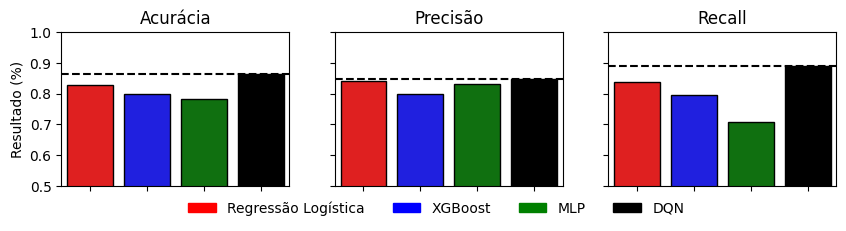

In [105]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

metrics = ["Accuracy", "Precision", "Recall"]
model_names = ["log_reg", "xgb", "mlp", "dqn"]
colors = ['red', 'blue', 'green', 'black']
labels = ['Regressão Logística', 'XGBoost', 'MLP', "DQN"]
NOME_PT = {"Accuracy" : "Acurácia", "Precision" : "Precisão", "Recall": "Recall",}

# Load results
results = pd.read_csv("surprise_plot.csv")

fig, ax = plt.subplots(figsize=(10, 2), nrows=1, ncols=3, sharey=True)
for idx_plot, metric in enumerate(metrics):
    sns.barplot(x='Model Name', y=metric, data=results, palette=colors, 
                hue='Model Name', ec='k', ax=ax[idx_plot])
    ax[idx_plot].set_title(NOME_PT[metric])
    ax[idx_plot].set_xlabel('')
    ax[idx_plot].set_ylim(0.5, 1)
    ax[idx_plot].set_ylabel('Resultado (%)')
    ax[idx_plot].axhline(y=float(results[results['Model Name'] == 'DQN'][metric]), color='black', linestyle='--')
    ax[idx_plot].set_xticks([0, 1, 2, 3], (' ', ' ', ' ', ' '))

#criar objetos para cada modelo
log_reg = mpatches.Patch(color='red', label='Regressão Logística')
xgb = mpatches.Patch(color='blue', label='XGBoost')
mlp = mpatches.Patch(color='green', label='MLP')
dqn = mpatches.Patch(color='black', label='DQN')

fig.legend(handles=[log_reg, xgb, mlp, dqn], loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=4, frameon=False)

plt.savefig("surprise_plot.png", bbox_inches='tight', dpi=500)

In [104]:
x = results[results['Model Name'] == 'DQN']['Accuracy']
print(type(float(x)))
print(float(x))

<class 'float'>
0.8648099450155392


/tmp/ipykernel_13074/1106145528.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(type(float(x)))
/tmp/ipykernel_13074/1106145528.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(float(x))


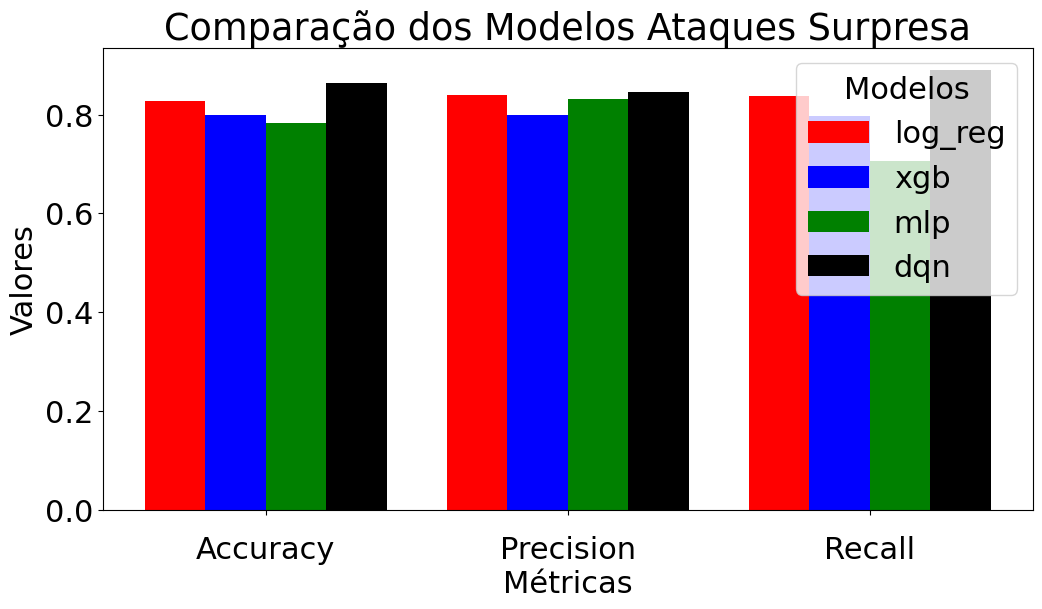

In [10]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Adjust font size
plt.rcParams.update({'font.size': 22})

# Define metrics and models
metrics = ["Accuracy", "Precision", "Recall"]
model_names = ["log_reg", "xgb", "mlp", "dqn"]
colors = ['red', 'blue', 'green', 'black']
labels = ['Logistic Regression', 'XGBoost', 'MLP', "DQN"]

# Load results
results = pd.read_csv("surprise_plot.csv")

# Set width of bar
barWidth = 0.2

# Set the figure size
plt.figure(figsize=(12, 6))

# Loop through each metric
for j, metric in enumerate(metrics):
    for i, model in enumerate(model_names):
        # Calculate bar positions
        pos = [x + (barWidth*i) for x in range(len(metrics))]

        # Fetch model metric values
        value = results.loc[results['Model Name'] == model, metric].values[0]

        # Plot the bar for the current model and metric
        plt.bar(pos[j], value, color=colors[i], width=barWidth, label=model if j == 0 else "")

# Set x-axis ticks and move labels below the axis
plt.xticks([r + barWidth*(len(model_names)-1)/2 for r in range(len(metrics))], metrics)

# Adjust the position and padding of the x-axis labels
plt.gca().tick_params(axis='x', which='major', pad=15)  # Increase the pad value if you need more space

# Add labels, legend, and titles
plt.xlabel('Métricas')
plt.ylabel('Valores')
plt.title('Comparação dos Modelos Ataques Surpresa')
plt.legend(title='Modelos', loc='upper right')

# Save the figure
plt.savefig("model_metrics_comparison.png")
